<img style="float: left;" src="images/ban2.png">

### Notes de cours
##### Préparées par Samuel Tremblay, VP-Éducation 2019-2020
#### Sommaire
1. Structures de décision
    * Avec condition ```if```
    * Avec erreur ```try/except```
2. Boucles d'itération
    * Boucles fixes ```for```
    * Boucles infinies ```while```
3. Régression simple
    * Modélisation avec ```scikit-learn```
    * Performance et prédiction
4. Visualisation de données
    * À l'aide de ```Matplotlib```
    * À l'aide de ```Bokeh```

## 1. Structures de décision 
### Avec condition ```if```
La structure de décision ```if``` est la base de la programmation logique, c'est-à-dire que l'ordinateur peut prendre une décision à condition qu'une logique soit vérifiée. Sa structure est la suivante : ```if (condition): (décision)```. Cependant, qu'arrive-t-il si la condition n'est pas vérifiée, ou que plusieurs conditions indépendantes existent? C'est ici que les expressions ```else``` et ```elif``` entrent en jeu, respectivement. Celles-cis sont placées toujours à la suite de ```if```. Il faut noter que ```else``` ne prend pas de condition à vérifier car elle revient à dire « ```if (condition)``` n'est pas vraie ». ```elif``` peut être vue comme un autre ```if``` et prend donc la même syntaxe.

In [1]:
# Définition d'une fonction implémentant la structure de décision
def que_vaut_x(x):
    if x > 4:
        print('x est supérieur à 4.')
    elif x < 4:
        print('x est inférieur à 4.')
    else:
        print('x est 4.')

# Test de la logique
que_vaut_x(5)
que_vaut_x(3)
que_vaut_x(4)

x est supérieur à 4.
x est inférieur à 4.
x est 4.


### Avec erreur ```try/except```
La structure de décision ```try/except``` est une manière robuste et facile de gérer les erreurs qui peuvent survenir lors de l'exécution d'un script. Elle est de la forme ```try: (code dangereux) except: (erreur à surveiller)```. Il est à noter que ```except``` supporte une variété de types d'erreurs grâce à la syntaxe suivante: ```except (type d'erreur):```. Ainsi, si le type n'est pas précisé, la structure empêchera toute erreur d'entraver la compilation.

In [21]:
y = (1, 2, 3)
# Impression d'une valeur inexistante (erreur d'indexation)
try:
    print(y[3])
except IndexError as e:
    print(e)

# Mutation d'une valeur d'un uplet (erreur de type)
try:
    y[0] = 2
except IndexError as e:
    print(e)

tuple index out of range


TypeError: 'tuple' object does not support item assignment

### Exercises - Structures de décision
#### 1.  Avec condition ```if```
a) Écrire une structure analysant la longueur d'une chaîne de caractères. Vérifier si celle-ci est (1) inférieure à 5 ou (2) supérieure ou égale à 5 ou (3) égale à 0 et imprimer un message approprié à l'utilisateur. 

b) Essayer avec la chaîne ```'miaou'```.

c) Essayer avec la chaîne ```''```.

d) Essayer avec la chaîne ```'Stella'```.


#### 2. Avec erreur ```try/except```
a) Écrire une structure permettant de gérer les deux types d'erreurs vu précédemment (```TypeError``` et ```IndexError```).

b) Tester avec ```print(y[3])```.

c) Tester avec ```y[0] = 2```.

## 2. Boucles d'itération
### Boucles fixes ```for```
Les boucles ```for``` permettent de répéter une série d'actions pour un nombre fixe et prédéterminé de fois. Elles sont aussi bien conçues, permettant d'itérer facilement sur les structures de données. Elles sont de la forme ```for (élément) in (structure itérative):``` et vont toujours aller chercher le premier niveau de données de la structure à laquelle elles sont appliquées. Elles peuvent également être imbriquées pour interagir avec les structures multidmensionnelles.

In [7]:
ma_liste = [[1,2,3],[4,5,6],[7,8,9]]
for sous_liste in ma_liste:
    print('La sous-liste', sous_liste, 'contient les éléments suivants:')
    for élément in sous_liste:
        print(élément)

La sous-liste [1, 2, 3] contient les éléments suivants:
1
2
3
La sous-liste [4, 5, 6] contient les éléments suivants:
4
5
6
La sous-liste [7, 8, 9] contient les éléments suivants:
7
8
9


### Boucles infinies ```while```
Les boucles ```while``` sont exécutées un nombre indéterminé de fois jusqu'à validation d'un critère d'arrêt. Celles-ci sont particulièrement utiles en mathématiques, lorsqu'il faut itérer jusqu'à convergence vers une solution. Elles ont la forme ```while (condition):```. Il est possible d'utiliser les appels à ```break``` et ```continue``` afin de stopper la boucle ou encore de sauter une itération. Il est cependant déconseillé de les utiliser.

In [6]:
x = 1
while x < 5:
    print('x vaut', x)
    x += 1

print('x vaut', str(x)+', fin des itérations')

x vaut 1
x vaut 2
x vaut 3
x vaut 4
x vaut 5, fin des itérations


### Exercises - Boucles d'itération
#### 3.  Boucles fixes ```for```
a) Écrire une boucle qui imprime chaque caractère dans la chaîne ```'Stella'```.

b) Écrire une boucle qui imprime seulement les éléments de la première sous-liste de ```ma_liste```.

#### 4. Boucles fixes ```while```
a) Écrire une boucle qui ajoute un ```u``` à la chaîne ```miaou``` jusqu'à ce que la chaîne ait 8 lettres.

## 3. Régression simple
### Modélisation avec ```scikit-learn```
La librairie ```scikit-learn``` implémente les concepts de base de la régression statistique en plus d'avoir des fonctions pratiques de réduction de dimensionnalité, d'aggrégation (*clustering*), de classification et bien d'autres. Puisque la librairie est construite en utilisant ```NumPy```, les données devront être fournies au modèle sous la forme d'un ```ndarray```. Dans cette section, les données seront traitées puis acheminées au modèle.

In [126]:
import numpy as np
from sklearn.linear_model import LinearRegression

# x doit être une matrice (plutôt qu'un vecteur comme y) 
# avec une colonne pour chaque prédicat et plusieurs lignes
x = np.array([[0], [5], [15], [25], [35], [45], [55]])
y = np.array([0, 6, 14, 27, 33, 48, 50])

print(x)
print(y)

# instanciation du modèle choisi ;
# tous les arguments sont ceux par défaut
model = LinearRegression()
# appel de la méthode .fit() sur model avec comme arguments x et y
model = model.fit(x, y)
# model.coef_ retourne la matrice des coefficients directeurs 
# et model_intercept l'ordonnée à l'origine
print('L\'équation de la régression est y = ', round(model.coef_[0],2),'x +', round(model.intercept_,2))

[[ 0]
 [ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 0  6 14 27 33 48 50]
L'équation de la régression est y =  0.95 x + 0.92


### Performance et prédiction
Maintenant que le modèle désiré a été instancié, il est possible d'utiliser deux méthodes très utiles : ```.score(x, y)``` permet de calculer le coefficient de détermination $R^2$ et ```predict(x)``` applique la droite de régression montrée à la section précédente à un ```ndarray``` d'une forme consistante (dans le cas ici, une matrice avec une colonne). Une série d'autres indicateurs de performance populaires seront également montrés : l'erreur absolue moyenne (*Mean Absolute Error*), l'erreur moyenne au carré (*Mean Squared Error*) et la racine de l'erreur moyenne au carré (*Root Mean Squared Error*).

In [149]:
# calcul de R^2 avec .score()
R_2 = model.score(x, y)
print('Le coefficient de détermination est:', round(R_2,4))

# prédiction en utilisant .predict()
y_pred = model.predict(x)
for i in range(0, len(x)):
    print('À la valeur x =',str(x[i][0])+', y vallait', y[i], 'et le modèle a prédit', round(y_pred[i],2))

# impression des métriques de performance
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y, y_pred), 4))
print('Mean Squared Error:', round(metrics.mean_squared_error(y, y_pred), 4))
print('Root Mean Squared Error:', round(np.sqrt((metrics.mean_squared_error(y, y_pred))), 4))

Le coefficient de détermination est: 0.9837
À la valeur x = 0, y vallait 0 et le modèle a prédit 0.92
À la valeur x = 5, y vallait 6 et le modèle a prédit 5.69
À la valeur x = 15, y vallait 14 et le modèle a prédit 15.22
À la valeur x = 25, y vallait 27 et le modèle a prédit 24.75
À la valeur x = 35, y vallait 33 et le modèle a prédit 34.28
À la valeur x = 45, y vallait 48 et le modèle a prédit 43.81
À la valeur x = 55, y vallait 50 et le modèle a prédit 53.34
Mean Absolute Error: 1.9304
Mean Squared Error: 5.4075
Root Mean Squared Error: 2.3254


### Exercises - Régression simple
#### 5.  Modélisation avec ```scikit-learn```
a) ```LinearRegression``` supporte la régression linéaire multiple. Ajouter un second prédicat à la matrice x afin d'effectuer une régression multiple. Celui-ci est : ```(1, 2 ,3, 4, 5, 6, 7)```.

#### 6. Performance et prédiction
a) Trouver le nouveau $R^2$ et la nouvelle MAE. Ont-ils augmenté ou diminué?

b) Prédire la valeur de $y$ pour $(x_1, x_2) = (65, 8)$.
## 4. Visualisation de données
### À l'aide de ```Matplotlib```
La librairie ```Matplotlib``` implémente des fonctions permettant la visualisation de données avec une utilisation similaire à celle de MatLab. La principale fonction d'intérêt est ```matplotlib.pyplot.plot```, qui permet de tracer un graphique 2D pour une série de points ayant des coordonnées $x$ et $y$. Celle-ci a la forme ```plt.plot(x, y, marqueur)``` (la librairie est renommée ```plt``` afin d'améliorer la lisibilité), où l'argument ```marqueur``` permet de spécifier le type de points, sa couleur et sa forme. Ensuite, il est possible d'ajouter une série de méthodes à ```plt``` qui vont permettre de spécifier différents éléments graphiques : titre, titres d'axes, légendes, etc. La méthode ```.show()``` permet de montrer le graphique à l'usager.

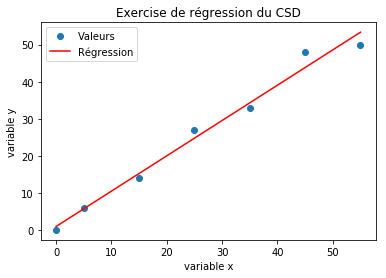

In [151]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o') # ajout des points 
plt.plot(x, y_pred, '-r') # ajout de la prédiction (régression)
plt.title('Exercise de régression du CSD') # ajout du titre
plt.xlabel('variable x') # ajout du titre de l'axe des x
plt.ylabel('variable y') # ajout du titre de l'axe des y
plt.legend(['Valeurs', 'Régression']) # ajout d'une légende
plt.show()

Pour les autres exemples, l'ensemble de données ```boston_crime_august_2018.xls``` sera utilisé afin de montrer un cas d'utilisation intéresant. Les visualisations suivantes seront montrées : l'histogramme ```.hist()```, la boîte à moustaches ```.boxplot()``` et le diagramme à bandes ```.bar()```.

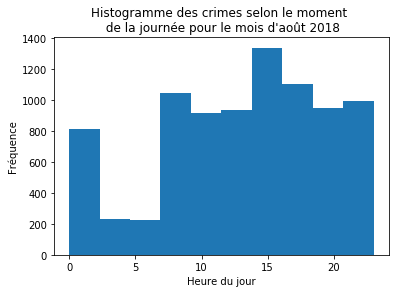

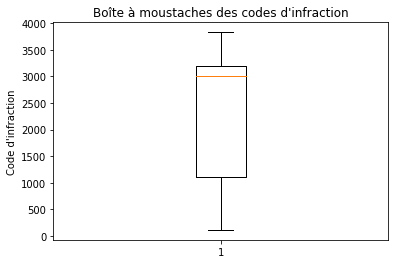

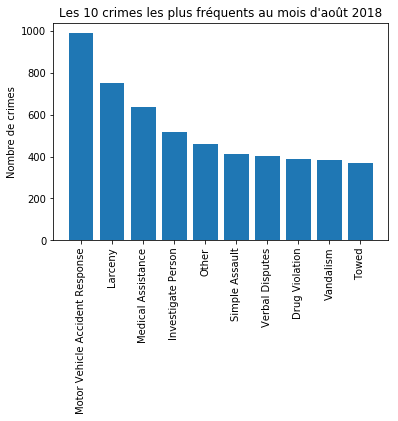

In [242]:
# importation des données
import pandas as pd
df = pd.read_excel('data/boston_crime_august_2018.xlsx')

# création d'un histogramme
plt.hist(df.HOUR)
plt.title('Histogramme des crimes selon le moment \n de la journée pour le mois d\'août 2018')
plt.xlabel('Heure du jour')
plt.ylabel('Fréquence')
plt.show()

# création d'une boîte à moustaches
plt.boxplot(df.OFFENSE_CODE)
plt.title('Boîte à moustaches des codes d\'infraction')
plt.ylabel('Code d\'infraction')
plt.show()

# création d'un diagramme à bandes
pivot_df = df.groupby(['OFFENSE_CODE_GROUP']).count()
pivot_df = pivot_df.sort_values(by = 'OFFENSE_CODE', ascending = False)
pivot_df = pivot_df[:10]
plt.bar(height = pivot_df.OFFENSE_CODE, x = pivot_df.index)
plt.xticks(pivot_df.index, rotation='vertical')
plt.title('Les 10 crimes les plus fréquents au mois d\'août 2018')
plt.ylabel('Nombre de crimes')
plt.show()

### Exercises - Visualisation de données
#### 7.  À l'aide de ```Matplotlib```
a) Produire un histogramme des codes d'infraction puis lui donner un titre ainsi que des titres d'axes.

b) Est-ce que cette visualisation est appropriée?